In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./IAEA_3D_MPI.txt", sep = "\s+", encoding = "utf-8", usecols = None, header = None)
df.head()

,0,1,2
0,-1,-1.0,-1.0
1,-1,-1.0,-1.0
2,-1,-1.0,-1.0
3,-1,-1.0,-1.0
4,-1,-1.0,-1.0


In [2]:
data = df.values
cols = ["index", "group_1", "group_2"]

df = pd.DataFrame(data = data, columns=cols)
df['index'] = df['index'].values.astype(int)
df.head()

,index,group_1,group_2
0,-1,-1.0,-1.0
1,-1,-1.0,-1.0
2,-1,-1.0,-1.0
3,-1,-1.0,-1.0
4,-1,-1.0,-1.0


In [3]:
n_groups = 2
n_x = 17
n_y = 17
n_z = 19

group_1 = np.empty((n_z, n_x,n_y))
group_2 = np.empty((n_z, n_x,n_y))

print("length : ", df.group_1.values.shape[0])

for idx_z in range(0, n_z):

    layer_group_1 = np.zeros((n_x,n_y))
    layer_group_2 = np.zeros((n_x,n_y))

    for idx_x in range(0, n_x):

        for idx_y in range(0, n_y):

            idx = n_x * n_y * idx_z + n_y * idx_x + idx_y
            
            if df.group_1.values[idx] == -1:
                layer_group_1[idx_x, idx_y] = 0
            else:
                layer_group_1[idx_x, idx_y] = df.group_1.values[idx]

            if df.group_2.values[idx] == -1:
                layer_group_2[idx_x, idx_y] = 0
            else:
                layer_group_2[idx_x, idx_y] = df.group_2.values[idx]

    group_1[idx_z,:,:] = layer_group_1
    group_2[idx_z,:,:] = layer_group_2

group_1 = np.transpose(group_1, (1,2,0))
group_2 = np.transpose(group_2, (1,2,0))

length :  5491


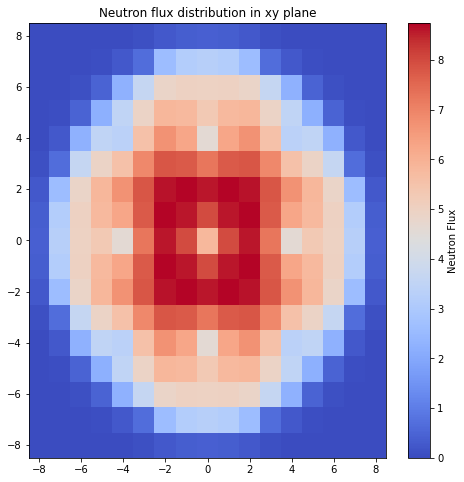

In [30]:
# 2D flux colorplot : xy plane
idx_z = 10

x = np.linspace(-8,8,17)
y = np.linspace(-8,8,17)

x_mesh, y_mesh = np.meshgrid(x,y)
psi = group_1[:,:,idx_z].reshape(n_x,n_y)

psi_min = psi.min()
psi_max = psi.max()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
c = ax.pcolor(x_mesh, y_mesh, psi, cmap = 'coolwarm', vmin = psi_min, vmax = psi_max)
cbar = fig.colorbar(c, ax = ax)
cbar.ax.set_ylabel("Neutron Flux")
plt.title("Neutron flux distribution in xy plane")
plt.show()

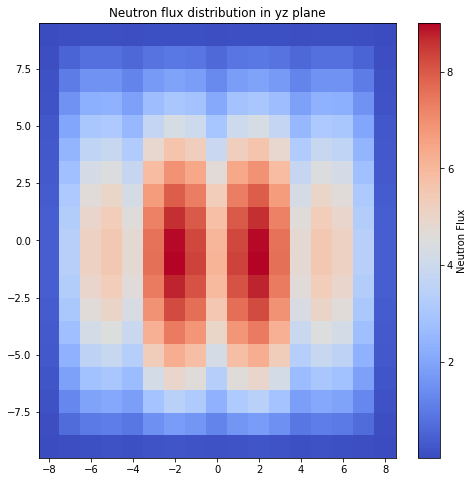

In [31]:
# 2D flux colorplot : yz plane where x = 0
idx_x = 8

y = np.linspace(-8,8,17)
z = np.linspace(-9,9,19)

y_mesh, z_mesh = np.meshgrid(y, z)
psi = group_1[idx_x,:,:].reshape(n_y,n_z).transpose()

psi_min = psi.min()
psi_max = psi.max()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
c = ax.pcolor(y_mesh, z_mesh, psi, cmap = 'coolwarm', vmin = psi_min, vmax = psi_max)
cbar = fig.colorbar(c, ax = ax)
cbar.ax.set_ylabel("Neutron Flux")
plt.title("Neutron flux distribution in yz plane")
plt.show()

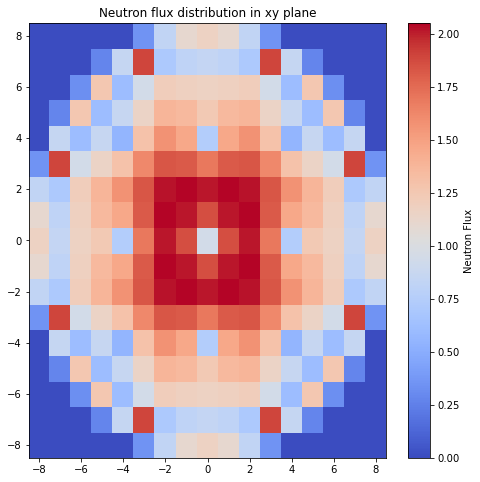

In [32]:
# 2D flux colorplot : xy plane
idx_z = 10

x = np.linspace(-8,8,17)
y = np.linspace(-8,8,17)

x_mesh, y_mesh = np.meshgrid(x,y)
psi = group_2[:,:,idx_z].reshape(n_x,n_y)

psi_min = psi.min()
psi_max = psi.max()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
c = ax.pcolor(x_mesh, y_mesh, psi, cmap = 'coolwarm', vmin = psi_min, vmax = psi_max)
cbar = fig.colorbar(c, ax = ax)
cbar.ax.set_ylabel("Neutron Flux")
plt.title("Neutron flux distribution in xy plane")
plt.show()

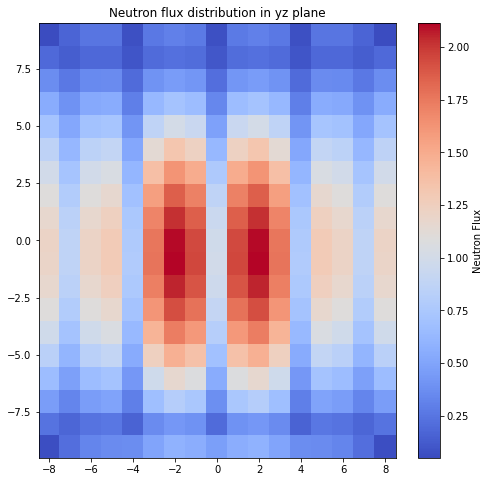

In [33]:
# 2D flux colorplot : yz plane where x = 0
idx_x = 8

y = np.linspace(-8,8,17)
z = np.linspace(-9,9,19)

y_mesh, z_mesh = np.meshgrid(y, z)
psi = group_2[idx_x,:,:].reshape(n_y,n_z).transpose()

psi_min = psi.min()
psi_max = psi.max()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
c = ax.pcolor(y_mesh, z_mesh, psi, cmap = 'coolwarm', vmin = psi_min, vmax = psi_max)
cbar = fig.colorbar(c, ax = ax)
cbar.ax.set_ylabel("Neutron Flux")
plt.title("Neutron flux distribution in yz plane")
plt.show()

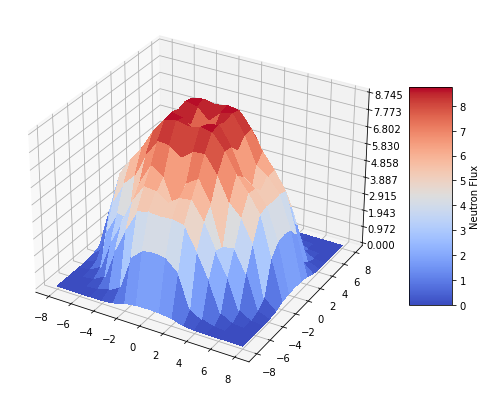

In [20]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

z_mesh = group_1[:,:,idx_z].reshape(n_x,n_y)

kw = {
    'vmin':z_mesh.min(),
    'vmax':z_mesh.max(),
}

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.zaxis.set_major_locator(LinearLocator(10))

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False, **kw)

fig.colorbar(surf, shrink = 0.5, aspect = 5, fraction = 0.1, label = 'Neutron Flux')
plt.show()

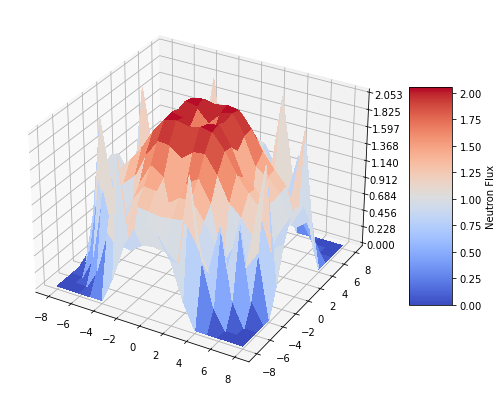

In [19]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

z_mesh = group_2[:,:,idx_z].reshape(n_x,n_y)

kw = {
    'vmin':z_mesh.min(),
    'vmax':z_mesh.max(),
}

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection = '3d')
ax.zaxis.set_major_locator(LinearLocator(10))

surf = ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap = cm.coolwarm, linewidth = 0, antialiased = False, **kw)

fig.colorbar(surf, shrink = 0.5, aspect = 5, fraction = 0.1, label = 'Neutron Flux')
plt.show()

/tmp/ipykernel_25407/2134277928.py:12: UserWarning: Trying to register the cmap 'cmap_custom' which already exists.
  plt.register_cmap(cmap = map_obj)


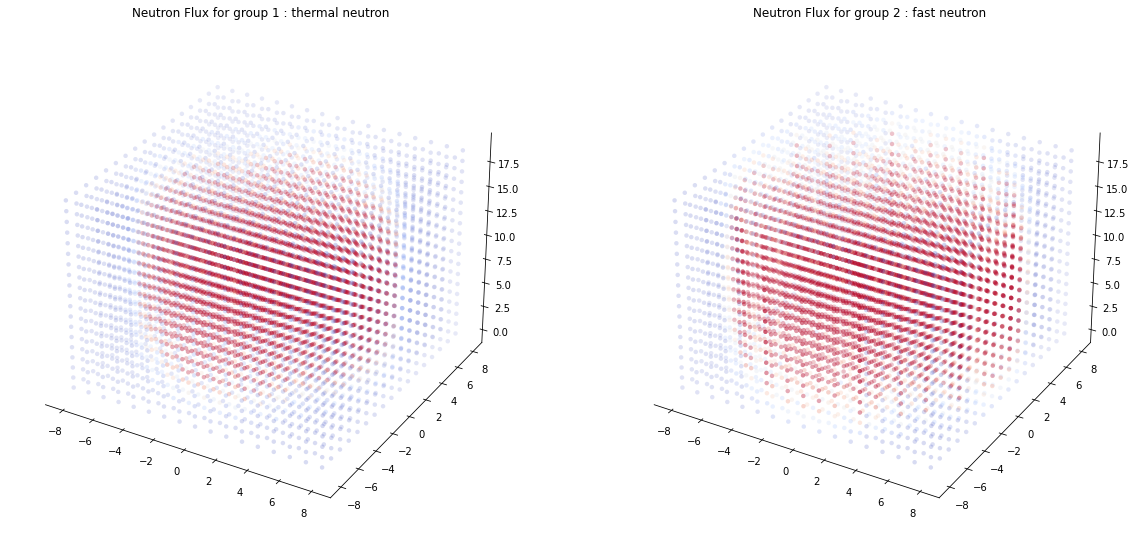

In [37]:
from matplotlib.colors import LinearSegmentedColormap

# set color map 
n_colors = 1024
color_arr = plt.get_cmap("coolwarm")(range(n_colors))
#color_arr = plt.get_cmap("seismic")(range(n_colors))
#color_arr = plt.get_cmap("bwr")(range(n_colors))

color_arr[:,-1] = np.linspace(0.25, 1.0, n_colors)

map_obj = LinearSegmentedColormap.from_list(name = "cmap_custom", colors = color_arr)
plt.register_cmap(cmap = map_obj)

# 3D flux plot using 4D colorplot
x = np.linspace(-8, 8, 17)
y = np.linspace(-8, 8, 17)
z = np.linspace(0, 19, 19)

x_mesh, y_mesh, z_mesh = np.meshgrid(x,y,z)

kw = {
    "linewidths" : 0,
    "edgecolors" : 'none',
    "cmap" : 'cmap_custom',
}

fig = plt.figure(figsize = (20,10))

ax = fig.add_subplot(121, projection = '3d')
ax.scatter(x_mesh, y_mesh, z_mesh, c = group_1, vmin = group_1.min(), vmax = group_1.max(), **kw)
ax.set_title("Neutron Flux for group 1 : thermal neutron")

# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

ax2 = fig.add_subplot(122, projection = '3d')
ax2.scatter(x_mesh, y_mesh, z_mesh, c = group_2, vmin = group_2.min(), vmax = group_2.max(), **kw)
ax2.set_title("Neutron Flux for group 2 : fast neutron")

# make the panes transparent
ax2.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax2.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax2.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax2.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

plt.show()